In [2]:
from darts.models.forecasting.lgbm import LightGBMModel
from darts import TimeSeries

Support for Torch based models not available. To enable them, install "darts", "u8darts[torch]" or "u8darts[all]" (with pip); or "u8darts-torch" or "u8darts-all" (with conda).
/home/mahdi/anaconda3/envs/darts/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pandas as pd
df = pd.read_csv('datasets/air_quality/BeijingPM25_0.csv')

In [4]:
df.head()

,ds,y
0,2010-01-02 00:00:00,129.0
1,2010-01-02 01:00:00,148.0
2,2010-01-02 02:00:00,159.0
3,2010-01-02 03:00:00,181.0
4,2010-01-02 04:00:00,138.0


<Axes: xlabel='ds'>

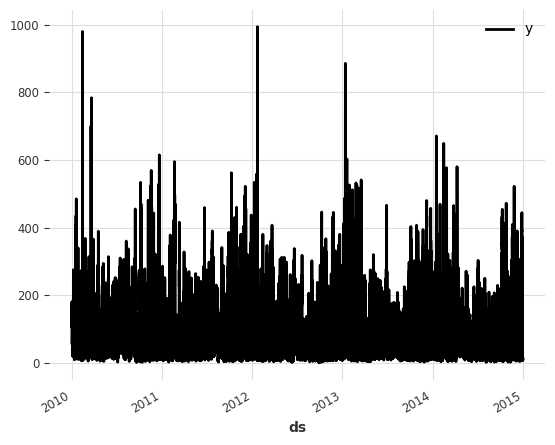

In [7]:
target_series = TimeSeries.from_dataframe(df, 'ds', 'y')

target_series.plot()

In [5]:
num_test = 24
target_series_train, target_series_test = target_series[:-num_test], target_series[-num_test:]
#num_val = num_test*1
#target_series_train, target_series_val = target_series_train[:-num_val], target_series_train[-num_val:]

<Axes: xlabel='ds'>

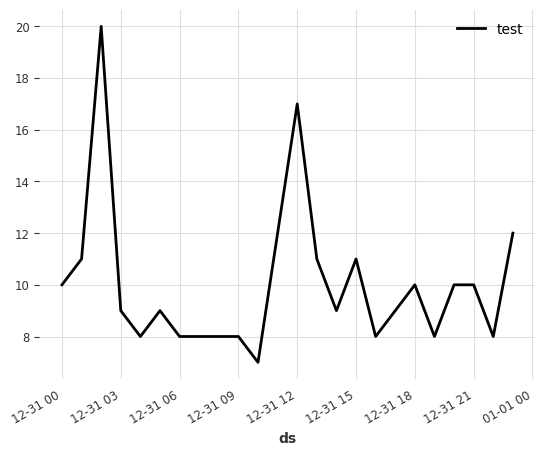

In [6]:
#target_series_val.plot(label='validation')
target_series_test.plot(label='test')

In [7]:
n_lags = 24*7
model = LightGBMModel(lags=n_lags, output_chunk_length=num_test)

In [8]:
model.fit(series=target_series_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.238375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 42840
[LightGBM] [Info] Number of data points in the train set: 43585, number of used features: 168
[LightGBM] [Info] Start training from score 98.372525
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.099890 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 42840
[LightGBM] [Info] Number of data points in the train set: 43585, number of used features: 168
[LightGBM] [Info] Start training from score 98.370965
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 42840
[LightGBM] [Info] Number of data points in the train set: 43585, number of used features: 168
[LightGBM]

LightGBMModel(lags=168, lags_past_covariates=None, lags_future_covariates=None, output_chunk_length=24, add_encoders=None, likelihood=None, quantiles=None, random_state=None, multi_models=True, use_static_covariates=True, categorical_past_covariates=None, categorical_future_covariates=None, categorical_static_covariates=None)

In [9]:
target_series_test_pred = model.predict(num_test)

<Axes: xlabel='ds'>

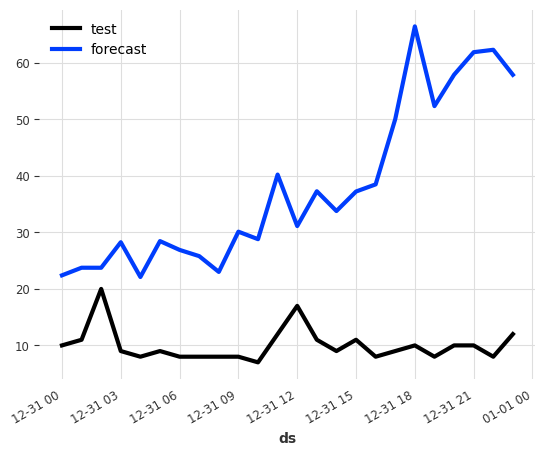

In [10]:
#target_series_train.plot(label='training')
target_series_test.plot(label='test', lw=3)
target_series_test_pred.plot(label='forecast', lw=3)